# Overview:
- Select a dataset with a continuous target variable.
- Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.
- Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [1]:
#imports
import pandas as pd
import numpy as np

#data
from pydataset import data

#vizualization libraries
from sklearn.model_selection import train_test_split

# sucess metrics from earlier in the week
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#scaling imports
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import sklearn.preprocessing

#personal imports
import explore

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Aquire the data:

In [2]:
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [3]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


## Prepare

In [4]:
# want to make all the columns lower case and replace the . with and _
swiss.columns = swiss.columns.str.lower().str.replace('.','_')

In [5]:
swiss.head()

,fertility,agriculture,examination,education,catholic,infant_mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [6]:
# split the data: 
def split_data(df, stratify = None, seed = 1234):
    '''
    This funciton will split the tips data into train, validate and test,
    It will split the data into 20% and 80% into test and train
    It will split the data into 30% and 70% into validate and train
    
    '''
    
    train_validate, test = train_test_split(df, test_size=.2, random_state= seed)
    train, validate = train_test_split(train_validate, test_size=.3, random_state= seed)
    
    return train, validate, test

In [7]:
train, validate, test = split_data(swiss)
train.head()

,fertility,agriculture,examination,education,catholic,infant_mortality
Veveyse,87.1,64.5,14,6,98.61,24.5
Rolle,60.5,60.8,16,10,7.72,16.3
Nyone,56.6,50.9,22,12,15.14,16.7
Lausanne,55.7,19.4,26,28,12.11,20.2
Echallens,68.3,72.6,18,2,24.20,21.2


In [8]:
# what are we trying to predict? infant_mortality
to_scale = ['fertility','agriculture','examination','education']

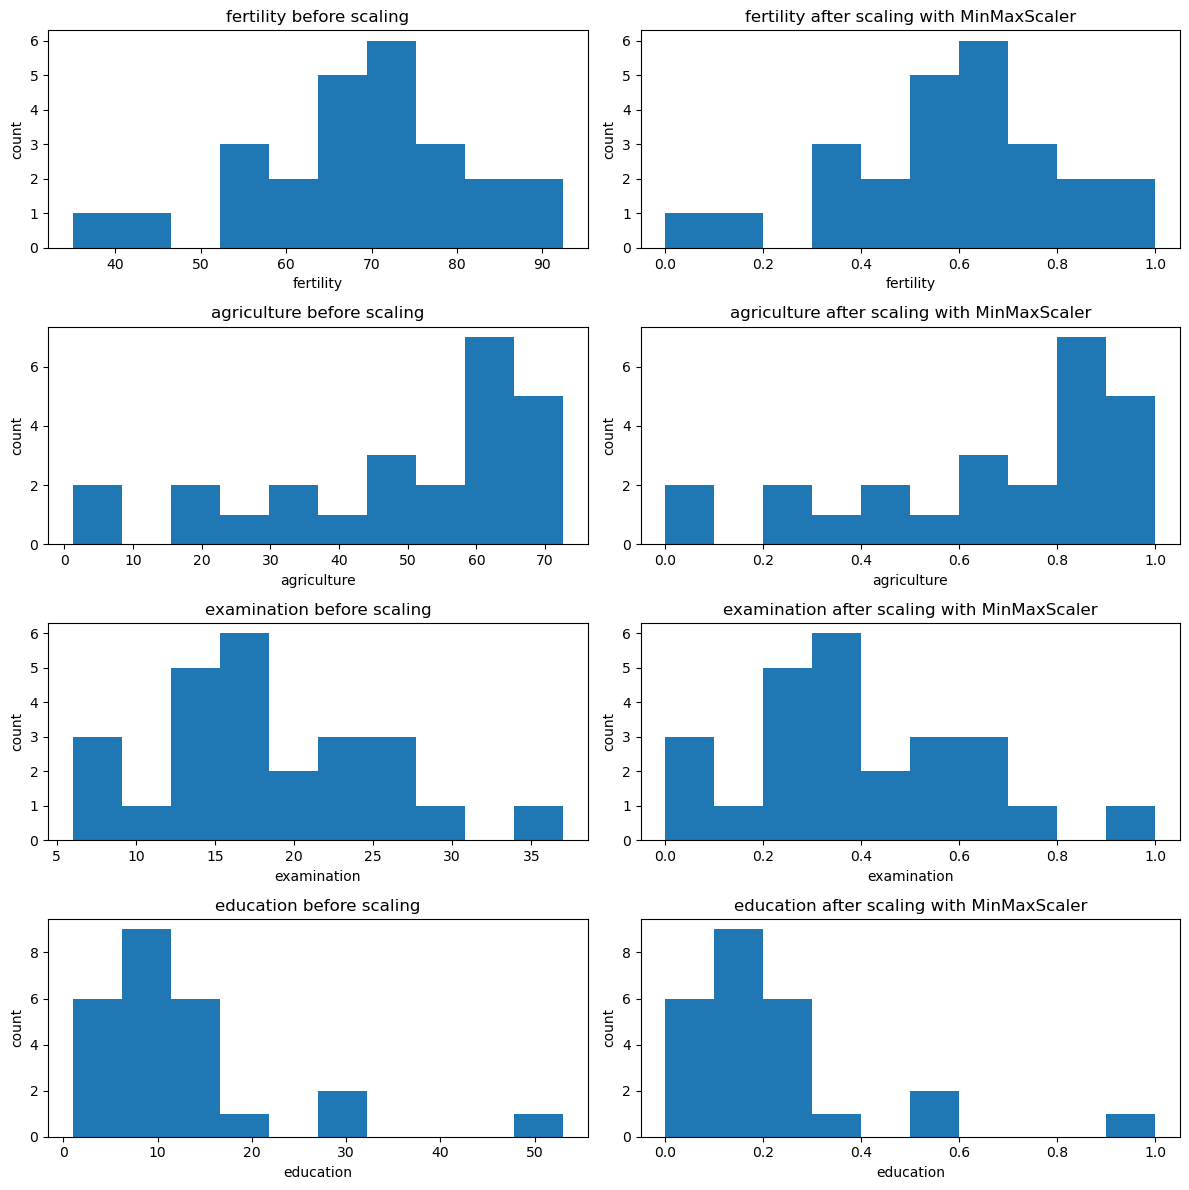

In [9]:
# vizualize scale: minmax
explore.visualize_scaler_2(MinMaxScaler(), train, columns_to_scale = to_scale, bins = 10)

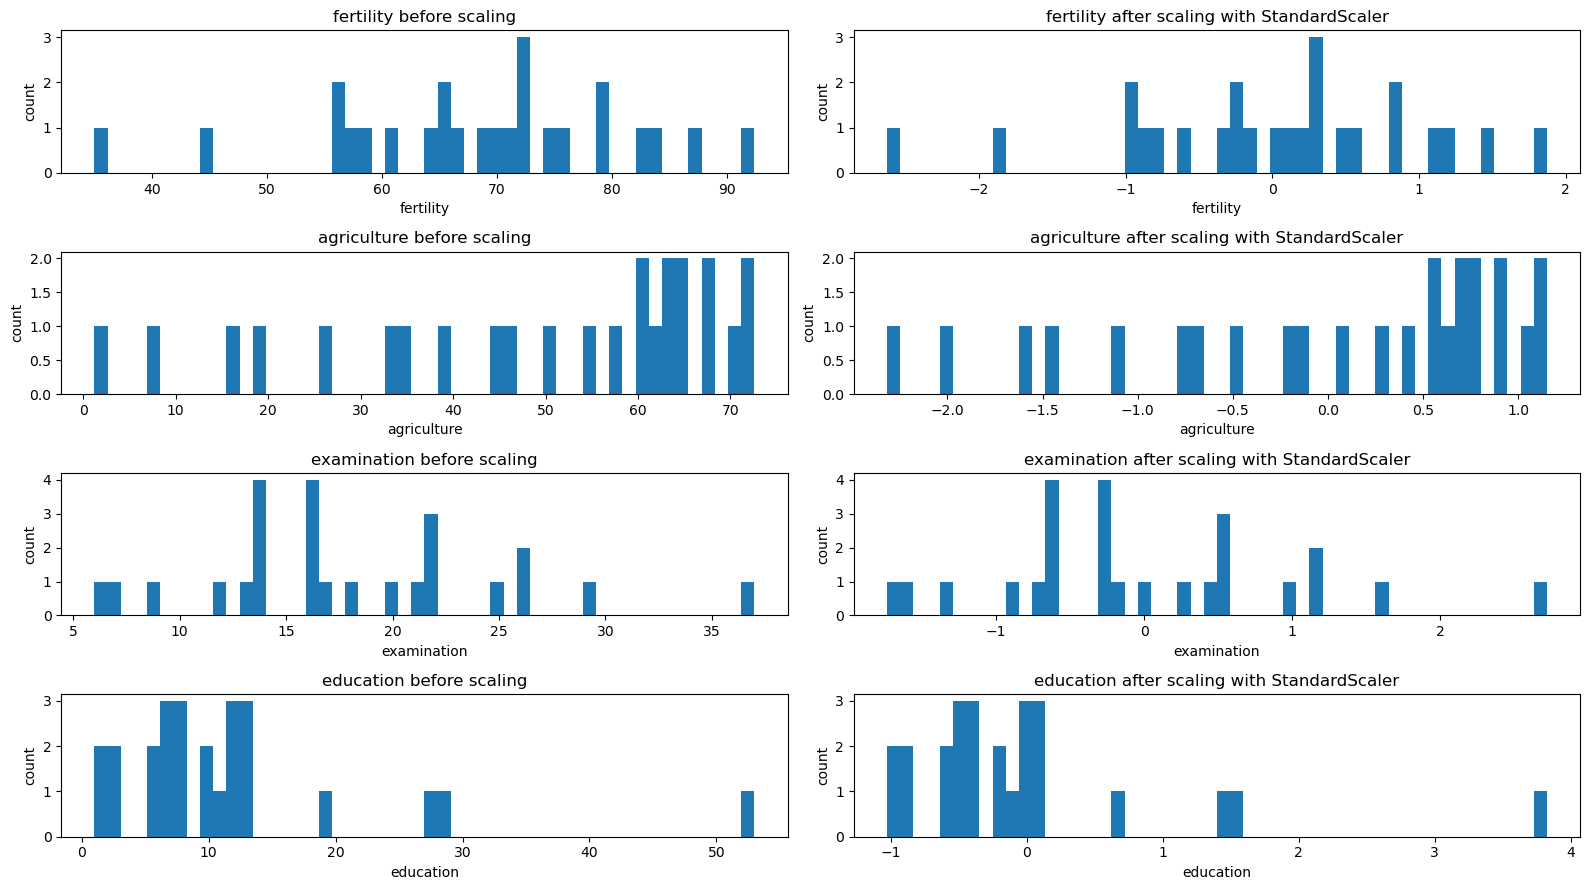

In [10]:
# visualize standard
explore.visualize_scaler(scaler=StandardScaler(), 
                 df=train, 
                 columns_to_scale=to_scale, 
                 bins=50)

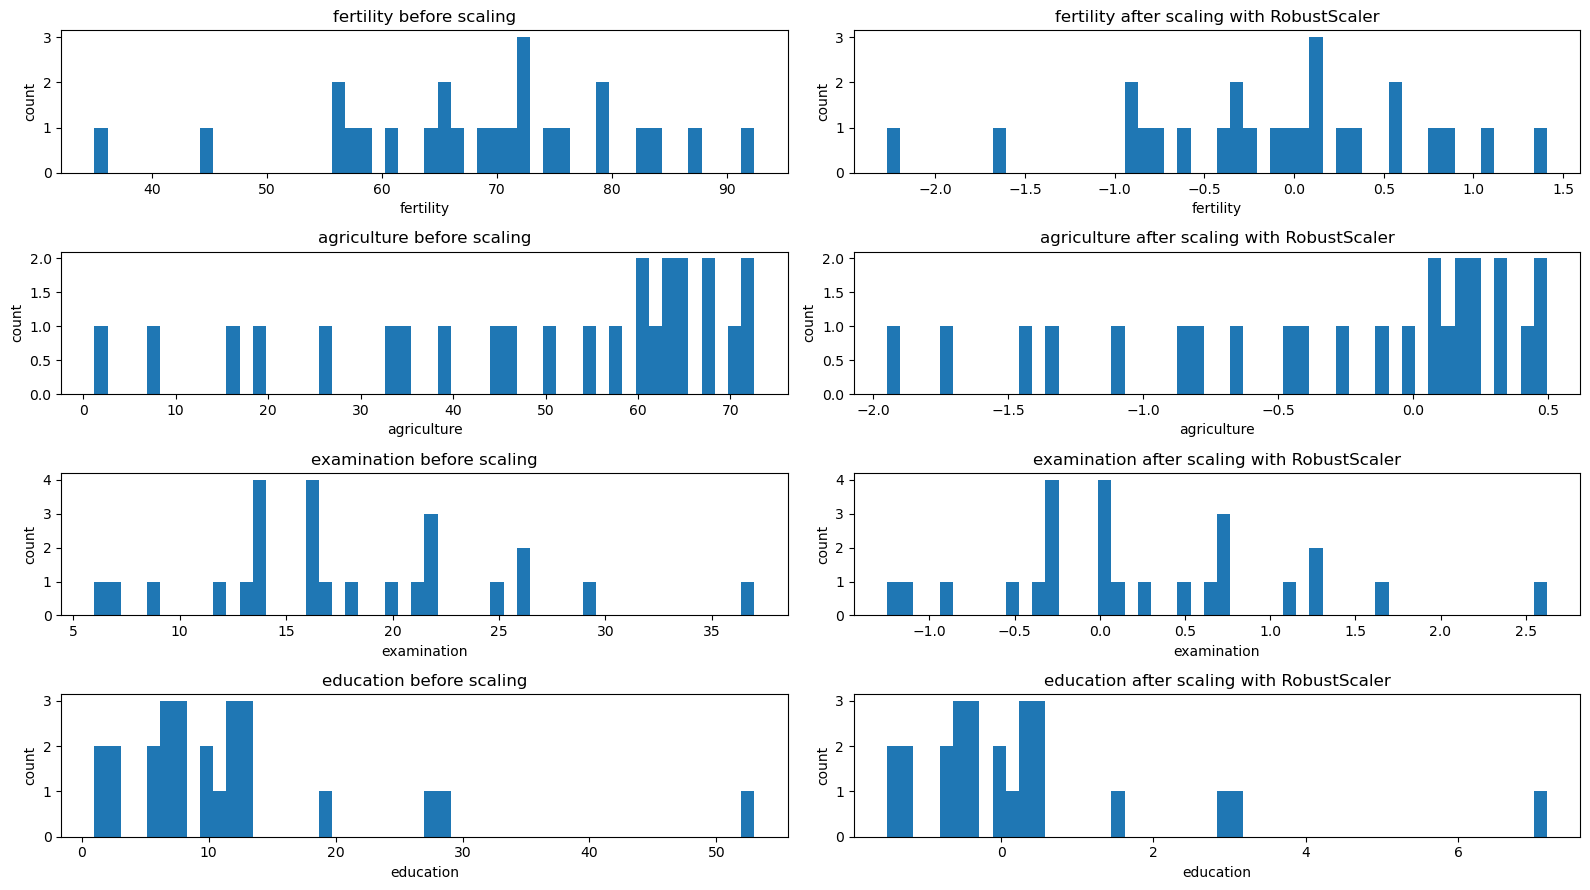

In [11]:
# call function with robustscaler
explore.visualize_scaler(scaler=RobustScaler(), 
                 df=train, 
                 columns_to_scale=to_scale, 
                 bins=50)

scaler to use is the minmax

In [12]:
# create the object
scaler = sklearn.preprocessing.MinMaxScaler()

# fit the object: 
scaler.fit(train[to_scale])

#use the object
scaled_train = scaler.transform(train[to_scale])
scaled_train[:10]

array([[0.90766551, 0.88655462, 0.25806452, 0.09615385],
       [0.44425087, 0.83473389, 0.32258065, 0.17307692],
       [0.37630662, 0.69607843, 0.51612903, 0.21153846],
       [0.36062718, 0.25490196, 0.64516129, 0.51923077],
       [0.58013937, 1.        , 0.38709677, 0.01923077],
       [0.53484321, 0.09103641, 0.74193548, 0.19230769],
       [0.65679443, 0.21708683, 0.51612903, 0.23076923],
       [0.771777  , 0.86694678, 0.22580645, 0.23076923],
       [0.6533101 , 0.98039216, 0.19354839, 0.        ],
       [0.3902439 , 0.74089636, 0.4516129 , 0.09615385]])

In [13]:
train[['fertility_scaled','agriculture_scaled','examination_scaled','education_scaled']] = scaled_train
train.head()

,fertility,agriculture,examination,education,catholic,infant_mortality,fertility_scaled,agriculture_scaled,examination_scaled,education_scaled
Veveyse,87.1,64.5,14,6,98.61,24.5,0.907666,0.886555,0.258065,0.096154
Rolle,60.5,60.8,16,10,7.72,16.3,0.444251,0.834734,0.322581,0.173077
Nyone,56.6,50.9,22,12,15.14,16.7,0.376307,0.696078,0.516129,0.211538
Lausanne,55.7,19.4,26,28,12.11,20.2,0.360627,0.254902,0.645161,0.519231
Echallens,68.3,72.6,18,2,24.20,21.2,0.580139,1.000000,0.387097,0.019231


In [35]:
train_unscaled = train[['fertility','agriculture','examination','education','catholic', 'infant_mortality']]
train_scaled = train[['fertility_scaled','agriculture_scaled','examination_scaled','education_scaled','infant_mortality']]

# No Scaled data

### Model : Regression

In [36]:
# split data into x and y
X_train = train_unscaled.drop(columns = 'infant_mortality')
y_train = train_unscaled['infant_mortality']

X_validate = validate.drop(columns = 'infant_mortality')
y_validate = validate['infant_mortality']

X_test = test.drop(columns = 'infant_mortality')
y_test = test['infant_mortality']

In [37]:
# create the baseline: 
baseline = y_train.mean()
baseline

20.208000000000002

In [38]:
#function to evaluate later along the line
def evaluate_reg(y, yhat):
    '''
    based on two series, y_act, y_pred, (y, yhat), we
    evaluate and return the root mean squared error
    as well as the explained variance for the data.
    
    returns: rmse (float), rmse (float)
    '''
    rmse = mean_squared_error(y, yhat, squared=False)
    r2 = r2_score(y, yhat)
    return rmse, r2

In [39]:
# need to make a baseline array that is the same shape as our y varibe:
baseline_array = np.repeat(baseline, y_train.shape[0])

In [40]:
# now we can use the eval function for our baseline
baseline_rmse, baseline_r2 = evaluate_reg(y_train, baseline_array)

In [41]:
# create a model that will show model comparisons over the exercises
eval_df = pd.DataFrame([{
    'model': 'baseline',
    'rmse': baseline_rmse,
    'r2': baseline_r2
}])

In [42]:
eval_df

,model,rmse,r2
0,baseline,2.945902,0.0


## OLS (Ordinary Least Squares) Model

In [43]:
#improt:
from sklearn.linear_model import LinearRegression

Only with the best feature (one feature)

In [44]:
from sklearn.feature_selection import RFE

In [45]:
# create the model:
lr1 = LinearRegression()

# use RFE
rfe = RFE(lr1, n_features_to_select = 1)

#fit the object
rfe.fit(X_train, y_train)

#transform

X_train_rfe = rfe.transform(X_train)

X_validate_rfe = rfe.transform(X_validate)

In [47]:
# feature that it selected?
rfe.get_feature_names_out()

array(['fertility'], dtype=object)

In [49]:
lr1.fit(X_train_rfe, y_train)

LinearRegression()

In [50]:
# evaluate:
y_pred_validate = lr1.predict(X_validate_rfe)

In [51]:
evaluate_reg(y_train, lr1.predict(X_train_rfe))

(2.25145811386316, 0.41589451728070237)

In [52]:
# lets add it to the dataframe we have made
rmse, r_2 = evaluate_reg(y_train, lr1.predict(X_train_rfe))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'ols_rfe_1',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)

In [53]:
eval_df

,model,rmse,r2
0,baseline,2.945902,0.000000
1,ols_rfe_1,2.251458,0.415895


In [54]:
# add the validate test to the model for a good compariosn
val_rmse, val_r2 = evaluate_reg(y_validate, lr1.predict(X_validate_rfe))
val_dict = {
    'model': 'ols_rfe_1',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}

In [55]:
val_scores = [val_dict]

With multiple features:

In [58]:
# make the model
lr2 = LinearRegression()

#fit the model
lr2.fit(X_train, y_train)


LinearRegression()

In [60]:
# evaluate: 
# add the data to the evalue df
rmse, r_2 = evaluate_reg(y_train, lr2.predict(X_train))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'ols_all_feats',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)

In [61]:
# add the evaluation of the predictions to validate
val_rmse, val_r2 = evaluate_reg(y_validate, lr2.predict(X_validate))
val_dict = {
    'model': 'ols_all_feats',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}
val_scores.append(val_dict)

In [64]:
# the model does better with all the features, is it over fit?
eval_df

,model,rmse,r2
0,baseline,2.945902,0.000000
1,ols_rfe_1,2.251458,0.415895
2,ols_all_feats,1.903967,0.582283


## LassoLars 
LASSO = Least Absolute Shrinkage and Selection Operator

LARS = Least Angle Regression

- Performs intrinsic feature selection and noise reduction to avoid overfitting
- The most important hyperparameter is alpha
- alpha determines the degree of regularization applied to the model
- The lowest alpha is zero, and this represents no regularization (identical to OLS)
- There is no limit to alpha, but as it rises, it will reach a point where performance no longer changes (often because you've regularized all of your coefficients to zero
- Generally speaking, the higher the alpha, the lower your risk for overfitting
- alpha = 1.0 is a good place to start
- alpha = 0, identical to OLS
- alpha = 1

In [67]:
#imports
from sklearn.linear_model import LassoLars

In [68]:
# fit a version of this that has an alpha of 1:
# make it
lasso = LassoLars(alpha=1)
# fit it:
lasso = lasso.fit(X_train, y_train)

In [69]:
lasso.coef_

array([ 0.13765452, -0.04061535,  0.        ,  0.        ,  0.02404764])

In [72]:
# evalute it 
rmse, r_2 = evaluate_reg(y_train, lasso.predict(X_train))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'lasso',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)

In [73]:
# evalute validate
val_rmse, val_r2 = evaluate_reg(y_validate, lasso.predict(X_validate))
val_dict = {
    'model': 'lasso',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}

In [74]:
val_scores.append(val_dict)

In [75]:
eval_df

,model,rmse,r2
0,baseline,2.945902,0.000000
1,ols_rfe_1,2.251458,0.415895
2,ols_all_feats,1.903967,0.582283
3,lasso,1.924769,0.573105


## Polynomial Regression

In [76]:
#imports 
from sklearn.preprocessing import PolynomialFeatures

In [77]:
# do a preprocessing step with our training data
# to transorm our x into combinations of x and x^2, x^3, etc
pf = PolynomialFeatures(degree=2)
# fit the thing, also use it
x_train_sq = pf.fit_transform(X_train)
# use this transformer to change our val and test:
x_val_sq = pf.transform(X_validate)
x_test_sq = pf.transform(X_test)

In [80]:
# make the model and fit it
plyreg = LinearRegression()
plyreg.fit(x_train_sq, y_train)

LinearRegression()

In [82]:
# evalute 
rmse, r_2 = evaluate_reg(y_train, plyreg.predict(x_train_sq))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'quad_reg',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)


In [83]:
# evaluate it on validate
val_rmse, val_r2 = evaluate_reg(y_validate, plyreg.predict(x_val_sq))
val_dict = {
    'model': 'quad_reg',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}

In [84]:
val_scores.append(val_dict)

In [85]:
eval_df

,model,rmse,r2
0,baseline,2.945902,0.000000
1,ols_rfe_1,2.251458,0.415895
2,ols_all_feats,1.903967,0.582283
3,lasso,1.924769,0.573105
4,quad_reg,0.196286,0.995560


In [86]:
# this model is very much overfit

## Generalized Linear Model (GLM):
The most flexible regression algorithm, the GLM allows for different distributions, beyond just the Normal Distribution for OLS (and other models based on OLS, like LASSO). We will use the TweedieRegressor method to create a GLM using sklearn.

About power:

power = 0: Normal Distribution
power = 1: Poisson Distribution
power = (1,2): Compound Distribution
power = 2: Gamma Distribution
power = 3: Inverse Gaussian Distribution

In [87]:
from sklearn.linear_model import TweedieRegressor

In [88]:
# same process as before!
# make the dang thing!
gams = TweedieRegressor(power=2)
# fit the dang ol thing
gams.fit(X_train, y_train)
# use it!

TweedieRegressor(power=2)

In [89]:
#evaluate
rmse, r_2 = evaluate_reg(y_train, gams.predict(X_train))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'gamma_ols',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)

In [90]:
val_rmse, val_r2 = evaluate_reg(y_validate, gams.predict(X_validate))
val_dict = {
    'model': 'gamma_ols',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}

In [91]:
val_scores.append(val_dict)

In [92]:
eval_df

,model,rmse,r2
0,baseline,2.945902,0.000000
1,ols_rfe_1,2.251458,0.415895
2,ols_all_feats,1.903967,0.582283
3,lasso,1.924769,0.573105
4,quad_reg,0.196286,0.995560
5,gamma_ols,1.906776,0.581049


## Best model:

In [93]:
val_scores = pd.DataFrame(val_scores)

In [94]:
val_scores

,model,val_rmse,val_r2
0,ols_rfe_1,3.379852,-1.340994
1,ols_all_feats,3.855953,-2.046971
2,lasso,3.653150,-1.734891
3,quad_reg,5.842099,-5.994276
4,gamma_ols,3.930084,-2.165253


In [99]:
import matplotlib.pyplot as plt

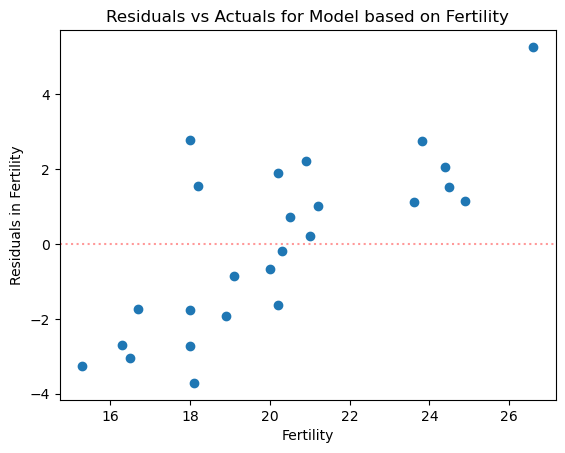

In [102]:

plt.scatter(y_train, y_train - lr1.predict(X_train_rfe))
plt.title('Residuals vs Actuals for Model based on Fertility')
plt.axhline(0, ls=':', c='r', alpha=0.4)
plt.xlabel('Fertility')
plt.ylabel('Residuals in Fertility')
plt.show()

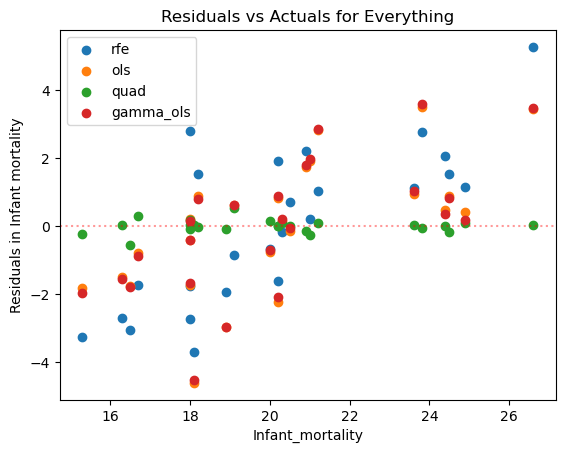

In [105]:
plt.scatter(y_train, y_train - lr1.predict(X_train_rfe), label='rfe')
plt.scatter(y_train, y_train - lr2.predict(X_train), label='ols')
plt.scatter(y_train, y_train - plyreg.predict(x_train_sq), label='quad')
plt.scatter(y_train, y_train - gams.predict(X_train), label='gamma_ols')
plt.title('Residuals vs Actuals for Everything')
plt.axhline(0, ls=':', c='r', alpha=0.4)
plt.xlabel('Infant_mortality')
plt.ylabel('Residuals in Infant mortality')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Distributions of Predicted Values vs Real Target')

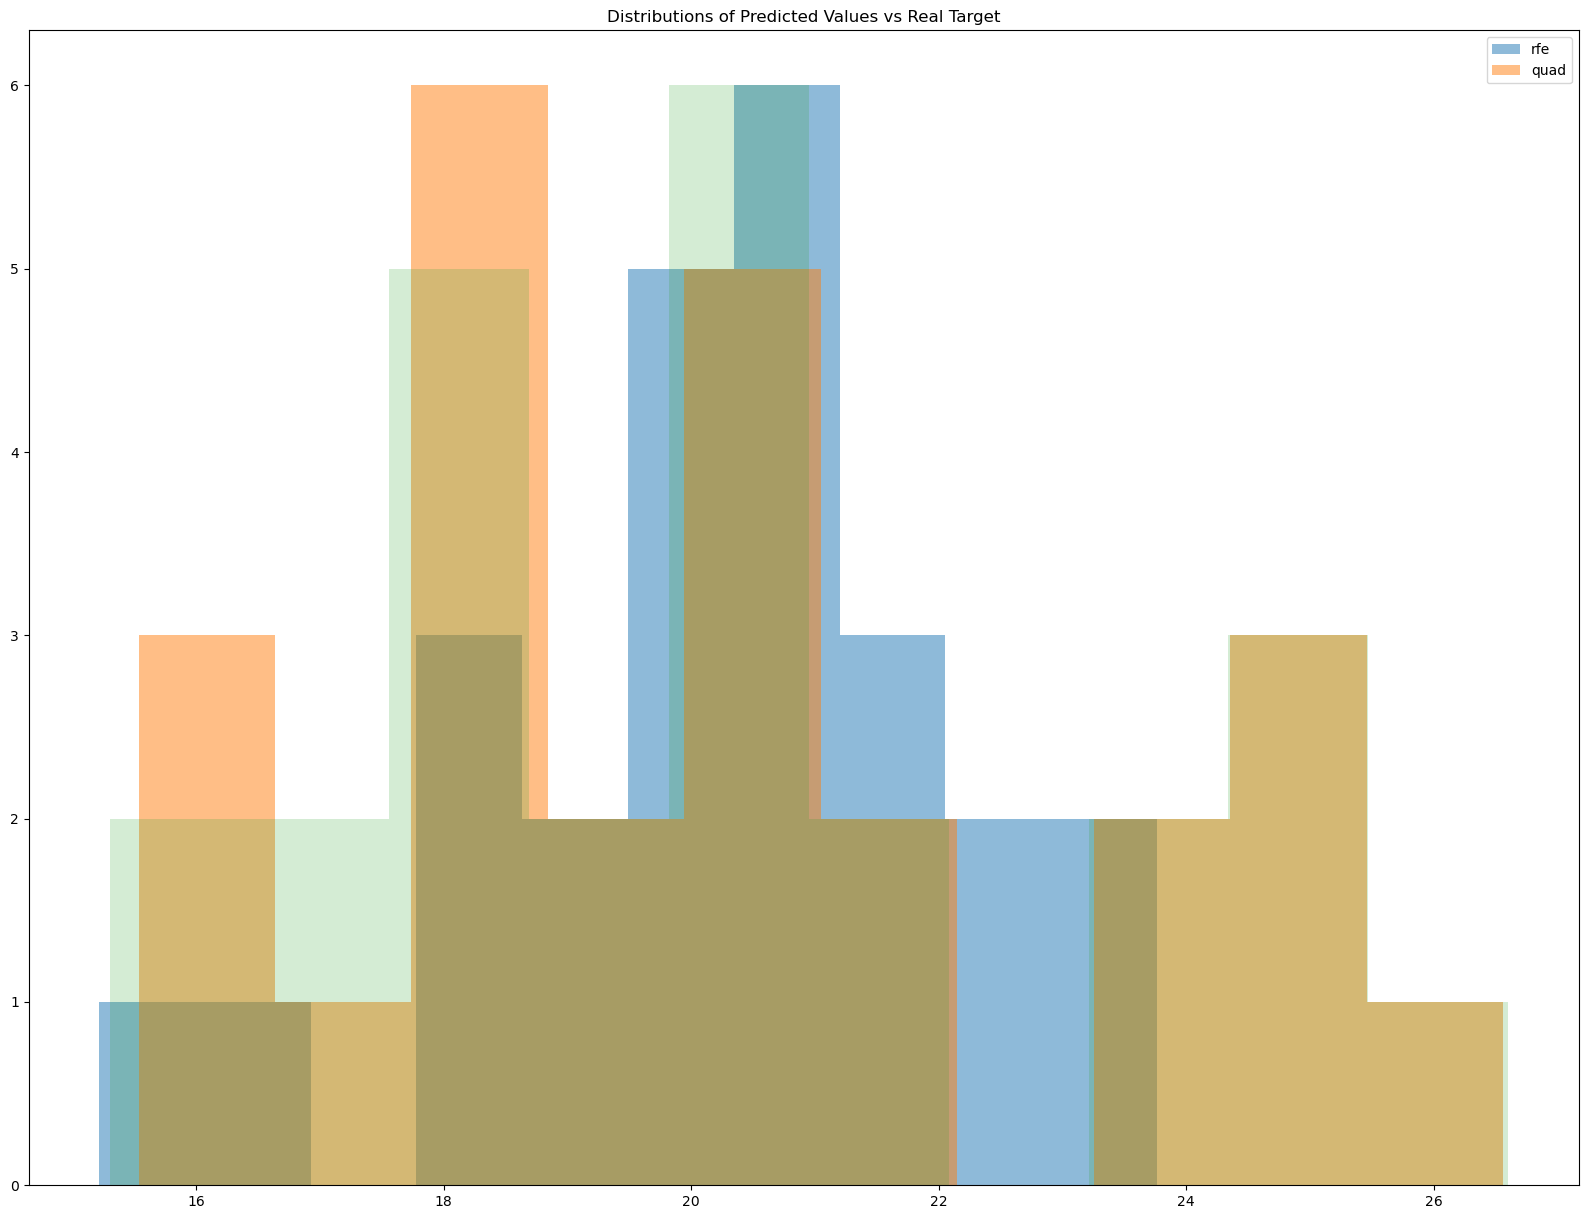

In [107]:

plt.figure(figsize=(20,15))
plt.hist(lr1.predict(X_train_rfe), alpha=0.5, label='rfe')
# plt.hist(lr2.predict(X), alpha=0.5, label='ols')
plt.hist(plyreg.predict(x_train_sq), alpha=0.5, label='quad')
# plt.hist(gams.predict(X), alpha=0.5, label='gamma_ols')
plt.hist(y_train, alpha=0.2)
plt.legend()
plt.title('Distributions of Predicted Values vs Real Target')